# ICE operations on Ecuadorians

This notebook will do an analysis of ICE data on operations, focusing on Ecuadorians. Data obtained from the [Deportation Data Project](https://deportationdata.org/), by the University of Washington Center for Human Rights. Codebook available [here](https://deportationdata.org/docs/ice.html).

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arrests = pd.read_excel("data/2025-ICLI-00019_2024-ICFO-39357_ERO Admin Arrests_raw.xlsx", skiprows=6)
deportations = pd.read_excel("data/2025-ICLI-00019_2024-ICFO-39357_ICE Removals_2025_only.xlsx", skiprows=6)

In [3]:
pd.set_option('display.max_rows', None)

## Arrests

Records every time ICE arrests someone, whether or not that arrest results in a decision to detain the person; or issues a Notice to Appear (NTA), the document that starts a deportation case. Note that other agencies also issue NTAs, and those would not appear as arrests in this table. We treat "apprehensions," "arrests," and "administrative arrests" as synonyms.

Data since 2023. 

In [4]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265226 entries, 0 to 265225
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Apprehension Date           265226 non-null  datetime64[ns]
 1   Apprehension State          208983 non-null  object        
 2   Apprehension County         0 non-null       float64       
 3   Apprehension AOR            259323 non-null  object        
 4   Final Program               265226 non-null  object        
 5   Final Program Group         265226 non-null  object        
 6   Apprehension Method         265226 non-null  object        
 7   Apprehension Criminality    265226 non-null  object        
 8   Case Status                 261328 non-null  object        
 9   Case Category               261328 non-null  object        
 10  Departed Date               145317 non-null  datetime64[ns]
 11  Departure Country           145279 non-

In [5]:
arrests["Apprehension Date"].dt.year.value_counts()

Apprehension Date
2025    116378
2024    109698
2023     39150
Name: count, dtype: int64

In [6]:
#First arrest in data
arrests["Apprehension Date"].dt.date.min().isoformat()

'2023-09-01'

In [7]:
#Last arrest in data
arrests["Apprehension Date"].dt.date.max().isoformat()

'2025-06-27'

In [8]:
#Since Trump
arrests[arrests["Apprehension Date"] >= "2025-01-20"]["Citizenship Country"].value_counts().head(10)

Citizenship Country
MEXICO                41795
GUATEMALA             15634
HONDURAS              12881
VENEZUELA              7983
EL SALVADOR            5368
NICARAGUA              3811
COLOMBIA               3548
ECUADOR                2963
CUBA                   2835
DOMINICAN REPUBLIC     1834
Name: count, dtype: int64

In [9]:
#Before Trump
arrests[arrests["Apprehension Date"] < "2025-01-20"]["Citizenship Country"].value_counts().head(10)

Citizenship Country
MEXICO                59241
GUATEMALA             17004
HONDURAS              16747
NICARAGUA             10877
VENEZUELA              7255
EL SALVADOR            6673
COLOMBIA               6395
ECUADOR                6376
CUBA                   3370
DOMINICAN REPUBLIC     3231
Name: count, dtype: int64

In [10]:
# Rolling average of daily arrests - all nationalities
daily_arrests = arrests["Apprehension Date"].dt.date.value_counts()
daily_arrests = pd.DataFrame(daily_arrests).reset_index()
daily_arrests["Apprehension Date"] = pd.to_datetime(daily_arrests["Apprehension Date"])
daily_arrests = daily_arrests.sort_values(by="Apprehension Date")

daily_arrests["7_day_rolling_avg"] = daily_arrests["count"].rolling(window=7).mean()
daily_arrests.index = daily_arrests["Apprehension Date"]

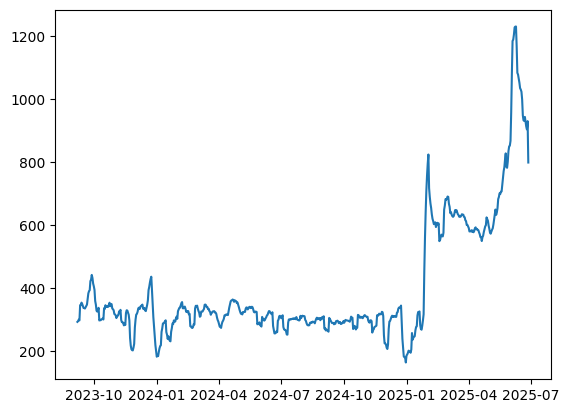

In [11]:
plt.plot(daily_arrests["count"].rolling(7).mean(),label= "7 days")

In [12]:
arrests_ny = arrests[
    (arrests["Apprehension State"] == "NEW YORK") & 
    (arrests["Apprehension Date"] >= "2025-01-20")
]["Apprehension Date"].dt.date.value_counts()

arrests_ny.mean()

21.855263157894736

In [13]:
arrests_ny_ec = arrests[
    (arrests["Apprehension State"] == "NEW YORK") & 
    (arrests["Apprehension Date"] >= "2025-01-20") &
    (arrests["Citizenship Country"] == "ECUADOR")
]["Apprehension Date"].dt.date.value_counts()

arrests_ny_ec.mean()

6.171875

In [14]:
# Rolling average of daily arrests - all nationalities
daily_arrests_ecu = arrests[arrests["Citizenship Country"] == "ECUADOR"]["Apprehension Date"].dt.date.value_counts()
daily_arrests_ecu = pd.DataFrame(daily_arrests_ecu).reset_index()
daily_arrests_ecu["Apprehension Date"] = pd.to_datetime(daily_arrests_ecu["Apprehension Date"])
daily_arrests_ecu = daily_arrests_ecu.sort_values(by="Apprehension Date")

daily_arrests_ecu["7_day_rolling_avg"] = daily_arrests_ecu["count"].rolling(window=7).mean()
daily_arrests_ecu.index = pd.to_datetime(daily_arrests_ecu["Apprehension Date"])

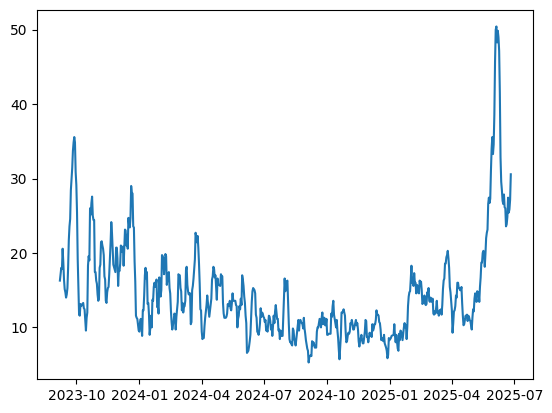

In [15]:
plt.plot(daily_arrests_ecu["count"].rolling(7).mean(),label= "7 days")

In [16]:
#For RAWgraphs
avg_all = daily_arrests.copy()
avg_all["7_day_avg"] = avg_all["count"].rolling(7).mean()
avg_all["Apprehension Date"] = pd.to_datetime(avg_all["Apprehension Date"])
avg_all = avg_all[["Apprehension Date", "7_day_avg"]]
avg_all.to_csv("processed_data/arrests_7_day_avg_all.csv", index=False)
####
avg_ecu = daily_arrests_ecu.copy()
avg_ecu["7_day_avg"] = avg_ecu["count"].rolling(7).mean()
avg_ecu["Apprehension Date"] = pd.to_datetime(avg_ecu["Apprehension Date"])
avg_ecu = avg_ecu[["Apprehension Date", "7_day_avg"]]
avg_ecu.to_csv("processed_data/arrests_7_day_ecu.csv", index=False)

In [17]:
states = arrests[arrests["Apprehension Date"] >= "2025-01-20"].groupby("Apprehension State")["Citizenship Country"].value_counts().groupby(level=0).head(1)
print(states)

Apprehension State              Citizenship Country            
ALABAMA                         MEXICO                               798
ALASKA                          MEXICO                                17
ARIZONA                         MEXICO                              1932
ARKANSAS                        MEXICO                               653
ARMED FORCES - EUROPE           MEXICO                                 1
ARMED FORCES - THE AMERICAS     MEXICO                                24
ARMED SERVICES - PACIFIC        VENEZUELA                              1
CALIFORNIA                      MEXICO                              3589
COLORADO                        MEXICO                               698
CONNECTICUT                     ECUADOR                               76
DELAWARE                        GUATEMALA                            102
DISTRICT OF COLUMBIA            HONDURAS                              13
FEDERATED STATES OF MICRONESIA  HONDURAS                    

In [18]:
arrestsecu_trump = arrests[(arrests["Apprehension Date"] >= "2025-01-20") & (arrests["Citizenship Country"] == "ECUADOR")]
len(arrestsecu_trump)

2963

In [19]:
arrestsecu_trump["Apprehension State"].value_counts().head()

Apprehension State
NEW YORK         790
NEW JERSEY       382
MASSACHUSETTS    308
MINNESOTA        191
PENNSYLVANIA     133
Name: count, dtype: int64

In [20]:
arrestsecu_trump["Apprehension Date"].dt.date.value_counts().head()

Apprehension Date
2025-06-04    95
2025-06-03    88
2025-05-28    65
2025-06-05    54
2025-05-29    51
Name: count, dtype: int64

In [21]:
arrestsecu_trump[(arrestsecu_trump["Apprehension Date"].dt.date == dt.date(2025, 6, 4)) & (arrestsecu_trump["Apprehension State"] == "NEW YORK")]["Apprehension Site Landmark"].value_counts()

Apprehension Site Landmark
NDD - 26 FEDERAL PLAZA NY, NY     32
ERIE COUNTY                        5
FUGITIVE OPERATIONS NY STATE       5
FUGITIVE OPERATIONS NY State       4
ATD NY STATE                       2
CIP GENERAL AREA, NON-SPECIFIC     2
SARATOGA COUNTY                    2
ONONDAGA COUNTY                    1
ALBANY COUNTY                      1
Name: count, dtype: int64

In [22]:
arrestsecu_trump[arrestsecu_trump["Apprehension State"] == "NEW YORK"]["Apprehension Site Landmark"].value_counts(normalize=True).head()

Apprehension Site Landmark
NDD - 26 FEDERAL PLAZA NY, NY     0.382278
ERIE COUNTY                       0.135443
FUGITIVE OPERATIONS NY STATE      0.082278
NBG GENERAL AREA, NON-SPECIFIC    0.075949
MONROE COUNTY                     0.069620
Name: proportion, dtype: float64

In [23]:
arrestsecu_trump["Apprehension Method"].value_counts()

Apprehension Method
Non-Custodial Arrest                    1438
Located                                  623
CAP Local Incarceration                  515
Other efforts                            135
CAP Federal Incarceration                125
Probation and Parole                      27
CAP State Incarceration                   23
ERO Reprocessed Arrest                    22
287(g) Program                            17
Law Enforcement Agency Response Unit      13
Worksite Enforcement                      10
Other Task Force                           8
Other Agency (turned over to INS)          3
Patrol Interior                            2
Transportation Check Bus                   1
Inspections                                1
Name: count, dtype: int64

## Deportations

In [24]:
deportations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144176 entries, 0 to 144175
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Departed Date                       144176 non-null  datetime64[ns]
 1   Port of Departure                   144176 non-null  object        
 2   Departure Country                   144176 non-null  object        
 3   Docket AOR                          144176 non-null  object        
 4   Apprehension State                  34198 non-null   object        
 5   Apprehension County                 0 non-null       float64       
 6   Case Status                         144176 non-null  object        
 7   Gender                              144176 non-null  object        
 8   Birth Country                       144176 non-null  object        
 9   Citizenship Country                 144176 non-null  object        
 10  Birth Da

In [25]:
deportations["Departed Date"].dt.year.value_counts()

Departed Date
2025    144176
Name: count, dtype: int64

In [26]:
deportations["Departed Date"].dt.date.min().isoformat()

'2025-01-01'

In [27]:
deportations["Departed Date"].dt.date.max().isoformat()

'2025-06-26'

In [28]:
deportations[deportations["Departed Date"] >= "2025-01-20"]["Birth Country"].value_counts().head(10)

Birth Country
MEXICO                58353
GUATEMALA             16410
HONDURAS              12446
VENEZUELA              7142
EL SALVADOR            5129
COLOMBIA               4370
ECUADOR                3778
NICARAGUA              2503
DOMINICAN REPUBLIC     2131
BRAZIL                 1651
Name: count, dtype: int64

In [29]:
deportationsecu_trump = deportations[
    (deportations["Citizenship Country"] == "ECUADOR") & 
    (deportations["Departed Date"] >= "2025-01-20")
].reset_index()
len(deportationsecu_trump)

3768

In [30]:
deportationsecu_trump["Case Criminality"].value_counts()

Case Criminality
3 Other Immigration Violator    2592
1 Convicted Criminal             600
2 Pending Criminal Charges       576
Name: count, dtype: int64

In [31]:
deportationsecu_trump["Gender"].value_counts()

Gender
Male       2763
Female     1003
Unknown       2
Name: count, dtype: int64

In [32]:
deportationsecu_trump["Birth Year"].value_counts().head()

Birth Year
2001    164
1999    155
1996    152
1998    149
1993    144
Name: count, dtype: int64

<Axes: >

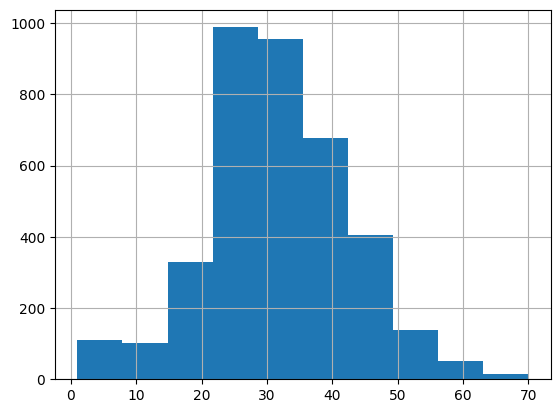

In [33]:
# age is not going to be exact since we don't have the birthdate
deportationsecu_trump["age"] = 2025 - deportationsecu_trump["Birth Year"]
deportationsecu_trump["age"].hist()

In [34]:
conditions = [
    deportationsecu_trump["age"] <= 10,
    deportationsecu_trump["age"] <= 20,
    deportationsecu_trump["age"] <= 30,
    deportationsecu_trump["age"] <= 40,
    deportationsecu_trump["age"] <= 50,
    deportationsecu_trump["age"] <= 60,
    deportationsecu_trump["age"] <= 70,

]
choices = ["<10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70"]

deportationsecu_trump["age_group"] = np.select(conditions, choices, default="70+")
deportationsecu_trump["age_group"].value_counts()

age_group
21-30    1372
31-40    1191
41-50     596
11-20     278
<10       157
51-60     148
61-70      26
Name: count, dtype: int64

In [35]:
deportationsecu_trump["age_group"].value_counts(normalize=True)

age_group
21-30    0.364119
31-40    0.316083
41-50    0.158174
11-20    0.073779
<10      0.041667
51-60    0.039278
61-70    0.006900
Name: proportion, dtype: float64

In [36]:
34.41 + 31.60

66.00999999999999

In [37]:
deportationsecu_trump["Entry Date"] = pd.to_datetime(deportationsecu_trump["Entry Date"])

In [38]:
deportationsecu_trump["Entry Date"].isna().value_counts()

Entry Date
False    3392
True      376
Name: count, dtype: int64

In [39]:
deportationsecu_trump["Entry Date"].dt.year.value_counts(normalize=True)

Entry Date
2025.0    0.353479
2024.0    0.316038
2023.0    0.146816
2022.0    0.073703
2021.0    0.048349
2019.0    0.011792
2016.0    0.010024
2020.0    0.007960
2017.0    0.007665
2013.0    0.005012
2014.0    0.004422
2015.0    0.002948
2012.0    0.002653
2018.0    0.002358
2001.0    0.001769
2009.0    0.000884
2000.0    0.000884
2005.0    0.000884
2010.0    0.000295
1992.0    0.000295
1997.0    0.000295
2002.0    0.000295
2004.0    0.000295
2006.0    0.000295
2007.0    0.000295
1988.0    0.000295
Name: proportion, dtype: float64

In [40]:
len(deportationsecu_trump[deportationsecu_trump["Entry Date"].dt.year < 2015])

64

In [41]:
deportationsecu_trump[deportationsecu_trump["Entry Date"].dt.year < 2015]["Case Criminality"].value_counts()

Case Criminality
1 Convicted Criminal            24
2 Pending Criminal Charges      23
3 Other Immigration Violator    17
Name: count, dtype: int64

In [42]:
deportationsecu_trump[
    (deportationsecu_trump["Entry Date"].dt.year < 2015) &
    (deportationsecu_trump["Case Criminality"] == "3 Other Immigration Violator")
][["Entry Date", "Final Order Date", "Latest Person Apprehension Date", "age", "Unique Identifier"]]

,Entry Date,Final Order Date,Latest Person Apprehension Date,age,Unique Identifier
859,2001-05-24,2002-05-29,2025-01-24 09:31:00,51,a0087b716dc27b508b585c9967b5bfa1a5c66c37
1366,2012-07-28,2013-06-18,2025-02-12 15:00:00,31,35006f451c915460c19dd8f8925c7654f24d1d69
1790,2002-02-16,2003-05-02,2025-03-06 10:05:00,46,75ac7b9efd30e75a2f2636d0c5111ba43f0460d2
2226,2014-01-14,2024-04-23,2025-04-03 13:33:00,40,bcc5f99c2b261c0f01461bc16261eb66aab7dfa3
2668,2001-04-01,2023-10-05,2025-02-13 09:49:00,45,af79968e65004a4817b5fe4c74d95dfd13734f5e
2862,2006-12-07,2007-02-06,2025-05-05 11:30:00,37,1da84fcbc2830cf0c1a9905693e1f9cb08ff666e
2914,2000-11-23,2025-05-06,2025-05-05 20:41:27,25,83a3429763ed7202f87045fee870e1b9cfddd8fe
2968,2005-08-30,2005-11-02,2025-03-20 14:51:00,54,fdc92b74c8ef431ad546e7ae3475169de9b65987
3165,2013-10-08,2015-04-21,2025-05-23 10:30:00,34,89b8639c5e83fd7e3f6d15bdce59366f9d53c27e
3169,2012-09-03,2013-05-09,2025-05-23 08:00:00,32,941c7e28b4fa0283e34326e6a22804ebe64f9174


In [43]:
arrests[arrests["Unique Identifier"] == "fdc92b74c8ef431ad546e7ae3475169de9b65987"].T

,260868
Apprehension Date,2025-03-20 14:51:00
Apprehension State,NEW JERSEY
Apprehension County,NaN
Apprehension AOR,Newark Area of Responsibility
Final Program,Fugitive Operations
Final Program Group,ICE
Apprehension Method,Located
Apprehension Criminality,3 Other Immigration Violator
Case Status,8-Excluded/Removed - Inadmissibility
Case Category,[8C] Excludable / Inadmissible - Administrativ...


In [44]:
deportationsecu_trump[deportationsecu_trump["Unique Identifier"] == "fdc92b74c8ef431ad546e7ae3475169de9b65987"].T

,2968
index,111518
Departed Date,2025-05-20 00:00:00
Port of Departure,"ALEXANDRIA INTERNATIONAL AIRPORT, POE"
Departure Country,ECUADOR
Docket AOR,Washington Area of Responsibility
Apprehension State,NaN
Apprehension County,NaN
Case Status,8-Excluded/Removed - Inadmissibility
Gender,Male
Birth Country,ECUADOR


In [45]:
deportationsecu_trump[deportationsecu_trump["Case Criminality"] == "3 Other Immigration Violator"]["Latest Person Apprehension Date"].dt.year.value_counts()

Latest Person Apprehension Date
2025    1690
2024     731
2023     109
2021      45
2022      14
2016       2
2019       1
Name: count, dtype: int64

In [46]:
deportationsecu_trump["days_usa"] = (
    deportationsecu_trump["Departed Date"] - deportationsecu_trump["Entry Date"]
).dt.days
deportationsecu_trump[(deportationsecu_trump["days_usa"].notna()) & (deportationsecu_trump["Case Criminality"] == "3 Other Immigration Violator")].sort_values(by="days_usa").tail()

,index,Departed Date,Port of Departure,Departure Country,Docket AOR,Apprehension State,Apprehension County,Case Status,Gender,Birth Country,...,Final Charge Code,Final Charge Section Code,Prior Deport Yes No,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier,age,age_group,days_usa
1790,66616,2025-03-25,"ALEXANDRIA INTERNATIONAL AIRPORT, POE",ECUADOR,HQ Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,ECUADOR,...,I6A,212a6Ai,NO,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",75ac7b9efd30e75a2f2636d0c5111ba43f0460d2,46,41-50,8438.0
859,36697,2025-02-11,"ALEXANDRIA INTERNATIONAL AIRPORT, POE",ECUADOR,Miami Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,ECUADOR,...,I6A,212a6Ai,NO,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",a0087b716dc27b508b585c9967b5bfa1a5c66c37,51,51-60,8664.0
2668,98795,2025-05-06,"HARLINGEN, TX, POE",ECUADOR,Harlingen Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,ECUADOR,...,I6A,212a6Ai,YES,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",af79968e65004a4817b5fe4c74d95dfd13734f5e,45,41-50,8801.0
3554,138699,2025-06-19,"PORT ISABEL, TX, POE",ECUADOR,Boston Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,ECUADOR,...,I6A,212a6Ai,NO,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",34e9d516ea4f86200f4faf81d8384b3d38a8e081,43,41-50,8840.0
2914,111000,2025-05-20,"ALEXANDRIA INTERNATIONAL AIRPORT, POE",ECUADOR,Buffalo Area of Responsibility,NaN,NaN,8-Excluded/Removed - Inadmissibility,Male,ECUADOR,...,I7A1,212a7AiI,NO,"(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",83a3429763ed7202f87045fee870e1b9cfddd8fe,25,21-30,8944.0


In [47]:
deportationsecu_trump[deportationsecu_trump["Unique Identifier"] == "83a3429763ed7202f87045fee870e1b9cfddd8fe"].T

,2914
index,111000
Departed Date,2025-05-20 00:00:00
Port of Departure,"ALEXANDRIA INTERNATIONAL AIRPORT, POE"
Departure Country,ECUADOR
Docket AOR,Buffalo Area of Responsibility
Apprehension State,NaN
Apprehension County,NaN
Case Status,8-Excluded/Removed - Inadmissibility
Gender,Male
Birth Country,ECUADOR


In [48]:
deportationsecu_trump["Departed Date"].dt.date.value_counts()

Departed Date
2025-01-28    192
2025-02-04    173
2025-04-22    141
2025-04-08    129
2025-05-20    127
2025-05-06    127
2025-04-29    125
2025-02-20    124
2025-02-27    124
2025-04-15    122
2025-02-11    121
2025-03-25    116
2025-01-22    111
2025-05-13    110
2025-06-24    106
2025-03-18    103
2025-03-05    102
2025-06-05     94
2025-01-23     93
2025-01-30     92
2025-06-10     88
2025-05-27     87
2025-03-11     84
2025-06-03     81
2025-02-13     79
2025-06-19     77
2025-06-17     76
2025-03-06     60
2025-03-27     55
2025-04-01     50
2025-02-06     47
2025-06-12     46
2025-02-12     33
2025-05-29     31
2025-06-26     22
2025-05-22     20
2025-02-08     12
2025-01-31     11
2025-02-10     10
2025-06-04      9
2025-06-23      9
2025-02-28      9
2025-04-07      9
2025-02-07      9
2025-05-05      8
2025-02-03      8
2025-04-30      8
2025-03-04      8
2025-04-05      7
2025-03-03      7
2025-02-16      7
2025-01-29      7
2025-02-18      6
2025-02-25      6
2025-02-17    

In [49]:
deportationsecu_trump[deportationsecu_trump["Departed Date"] == "2025-01-28"]["Latest Person Apprehension Date"].dt.year.value_counts()

Latest Person Apprehension Date
2025    122
2024     70
Name: count, dtype: int64

In [50]:
deportationsecu_trump["Case Category"].value_counts()

Case Category
[8C] Excludable / Inadmissible - Administrative Final Order Issued             1548
[8F] Expedited Removal                                                          952
[8G] Expedited Removal - Credible Fear Referral                                 811
[16] Reinstated Final Order                                                     328
[3] Deportable - Administratively Final Order                                    68
[11] Administrative Deportation / Removal                                        20
[1A] Voluntary Departure - Un-Expired and Un-Extended Departure Period           15
[8H] Expedited Removal - Status Claim Referral                                    7
[2A] Deportable - Under Adjudication by IJ                                        5
[10] Visa Waiver Deportation / Removal                                            4
[8B] Excludable / Inadmissible - Under Adjudication by IJ                         3
[9] VR Under Safeguards                                       

In [51]:
deportationsecu_trump["Departure Country"].value_counts()

Departure Country
ECUADOR                   3663
PANAMA                      40
MEXICO                      26
COLOMBIA                    18
VENEZUELA                    6
UNKNOWN                      3
BRITISH VIRGIN ISLANDS       2
NICARAGUA                    2
SPAIN                        1
CUBA                         1
ITALY                        1
PAKISTAN                     1
HONDURAS                     1
BRAZIL                       1
EAST TIMOR                   1
EL SALVADOR                  1
Name: count, dtype: int64

In [52]:
deportationsecu_trump[deportationsecu_trump["Departure Country"] == "EL SALVADOR"].T

,3615
index,139506
Departed Date,2025-06-19 00:00:00
Port of Departure,"HARLINGEN, TX, POE"
Departure Country,EL SALVADOR
Docket AOR,New Orleans Area of Responsibility
Apprehension State,LOUISIANA
Apprehension County,NaN
Case Status,6-Deported/Removed - Deportability
Gender,Male
Birth Country,ECUADOR


In [53]:
arrests[arrests["Unique Identifier"] == "f370e33ad0494000e3d1055ecd9cfcb3dd2fbaa0"].T

,250185
Apprehension Date,2025-06-09 09:32:23
Apprehension State,LOUISIANA
Apprehension County,NaN
Apprehension AOR,New Orleans Area of Responsibility
Final Program,ERO Criminal Alien Program
Final Program Group,ICE
Apprehension Method,CAP Federal Incarceration
Apprehension Criminality,1 Convicted Criminal
Case Status,6-Deported/Removed - Deportability
Case Category,[11] Administrative Deportation / Removal


In [54]:
deportationsecu_trump[deportationsecu_trump["Departure Country"] == "PANAMA"][["Case Criminality"]].value_counts()

Case Criminality            
3 Other Immigration Violator    39
1 Convicted Criminal             1
Name: count, dtype: int64

In [55]:
deported_data = deportationsecu_trump[["Gender", "age_group", "Case Criminality"]]

In [56]:
deported_data.to_csv("processed_data/deport_data.csv", index=False)